In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

import os

from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
import seaborn as sns

from sklearn.metrics import mean_squared_error
from math import sqrt 

import statsmodels.api as sm

from statsmodels.tsa.api import Holt

import functions

In [2]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [3]:
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

## Exercises
Use either the SAAS dataset or the store data and:

In [4]:
url = 'https://ds.codeup.com/saas.csv'
df = pd.read_csv(url)
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [5]:
df.shape

(790458, 5)

In [6]:
df.columns = [col.lower() for col in df]

In [7]:
df.head(3)

,month_invoiced,customer_id,invoice_id,subscription_type,amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0


In [8]:
# I dont like the long name 
df.rename(columns=
{'month_invoiced':'invoiced'}, inplace=True)

In [9]:
# Check it
df.head(1)

,invoiced,customer_id,invoice_id,subscription_type,amount
0,2014-01-31,1000000,5000000,0.0,0.0


In [10]:
# Change date to datetime format
df.invoiced = pd.to_datetime(df.invoiced)

In [11]:
# Check that it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoiced           790458 non-null  datetime64[ns]
 1   customer_id        790458 non-null  int64         
 2   invoice_id         790458 non-null  int64         
 3   subscription_type  790458 non-null  float64       
 4   amount             790458 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 30.2 MB


In [12]:
# Check column value counts
for col in df:
    print(df[col].value_counts())
    print('----------')

2014-01-31    20000
2014-02-28    19800
2014-03-31    19599
2014-04-30    19413
2014-05-31    19221
2014-06-30    19038
2014-07-31    18851
2014-08-31    18672
2014-09-30    18494
2014-10-31    18313
2014-11-30    18145
2014-12-31    17996
2015-01-31    17829
2015-02-28    17680
2015-03-31    17530
2015-04-30    17376
2015-05-31    17225
2015-06-30    17089
2015-07-31    16951
2015-08-31    16817
2015-09-30    16671
2015-10-31    16529
2015-11-30    16387
2015-12-31    16268
2016-01-31    16142
2016-02-29    16019
2016-03-31    15895
2016-04-30    15777
2016-05-31    15685
2016-06-30    15571
2016-07-31    15460
2016-08-31    15355
2016-09-30    15240
2016-10-31    15144
2016-11-30    15049
2016-12-31    14938
2017-01-31    14840
2017-02-28    14741
2017-03-31    14665
2017-04-30    14576
2017-05-31    14475
2017-06-30    14400
2017-07-31    14312
2017-08-31    14209
2017-09-30    14131
2017-10-31    14041
2017-11-30    13985
2017-12-31    13914
Name: invoiced, dtype: int64
----------


In [13]:
# Set the index
df = df.set_index('invoiced')
# Check it
df.head()

,customer_id,invoice_id,subscription_type,amount
invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0


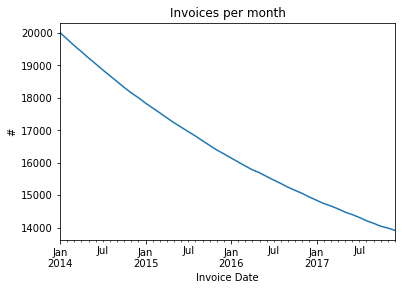

In [14]:
#df.resample('M').plot()
df.resample('M').size().plot()
plt.ylabel('#')
plt.xlabel('Invoice Date')
plt.title('Invoices per month')
plt.show()

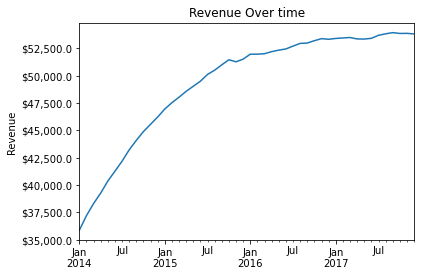

In [15]:
ax = df.resample('M').amount.sum().plot()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))
ax.set(title='Revenue Over time', ylabel='Revenue', xlabel='')
plt.show()

#### Q: Split data (train/validate/test) and resample by any period except daily. Aggregate using the sum.

In [16]:
df = df.resample('M')[['amount']].sum()

In [17]:
df.head(3)

,amount
invoiced,
2014-01-31,35850.0
2014-02-28,37190.0
2014-03-31,38295.0


In [18]:
len(df)

48

In [19]:
print(len(df)*0.5)
print(len(df)*0.3)
print(len(df)*0.2)

24.0
14.399999999999999
9.600000000000001


In [20]:
train = df[:24]
validate = df[24:(24+14)]
test= df[(24+14):]

In [21]:
print(train.shape)
print(validate.shape)
print(test.shape)

(24, 1)
(14, 1)
(10, 1)


In [22]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


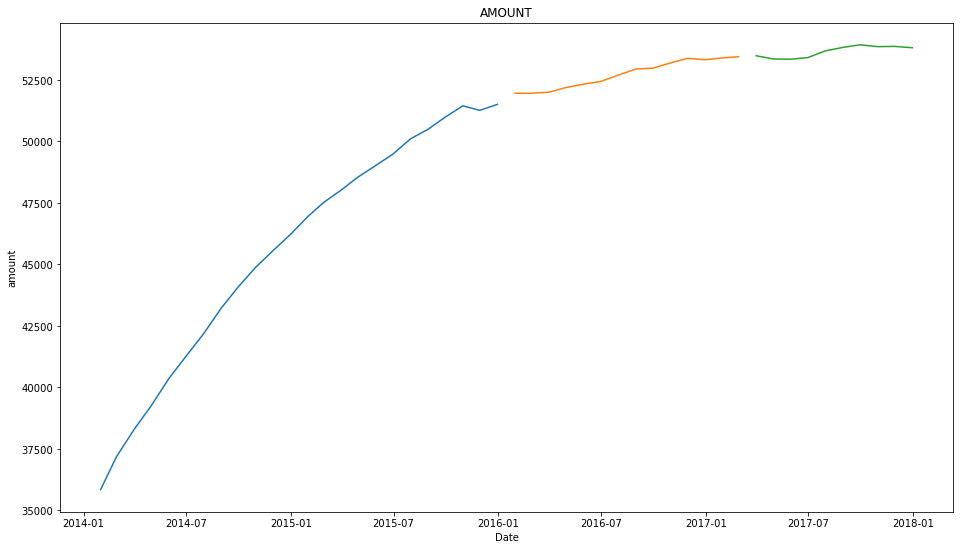

In [23]:
for col in train.columns:
    plt.figure(figsize=(16,9))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.xlabel('Date')
    plt.title(col.upper())
    plt.show()

#### Q: Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
    - Simple Average
    - Moving Average
    - Holt's Linear Trend Model
    - Based on previous year/month/etc., this is up to you.

## Last Observed:

In [24]:
yhat_df = pd.DataFrame(
    {'amount': [train['amount'][-1:][0]]},
    index=validate.index)

yhat_df.head()

,amount
invoiced,
2016-01-31,51505.0
2016-02-29,51505.0
2016-03-31,51505.0
2016-04-30,51505.0
2016-05-31,51505.0


amount RMSE: 1343


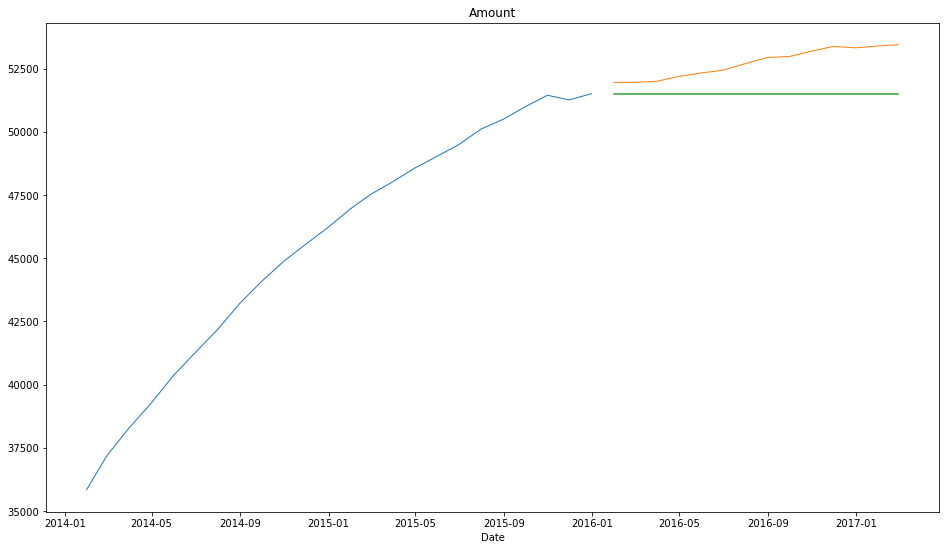

In [25]:
plt.figure(figsize = (16,9))
plt.plot(train['amount'], label='Train', linewidth=1)
plt.plot(validate['amount'], label='Validate', linewidth=1)
plt.plot(yhat_df['amount'])
plt.title('Amount')
plt.xlabel('Date')
rmse = round(sqrt(mean_squared_error(validate['amount'], yhat_df['amount'])), 0)
print('amount', 'RMSE: {:.0f}'.format(rmse))
plt.show()

In [26]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'Last Observed', 
                             target_var = col)

eval_df

,model_type,target_var,rmse
0,Last Observed,amount,1343.0


## Simple Average:

In [27]:
def make_predictions(amount=None):
    yhat_df = pd.DataFrame({'amount': [amount]},
                          index=validate.index)
    return yhat_df

In [28]:
yhat_df = make_predictions(round(train['amount'].mean(), 2))
yhat_df.head(3)

,amount
invoiced,
2016-01-31,45568.54
2016-02-29,45568.54
2016-03-31,45568.54


amount RMSE: 7181


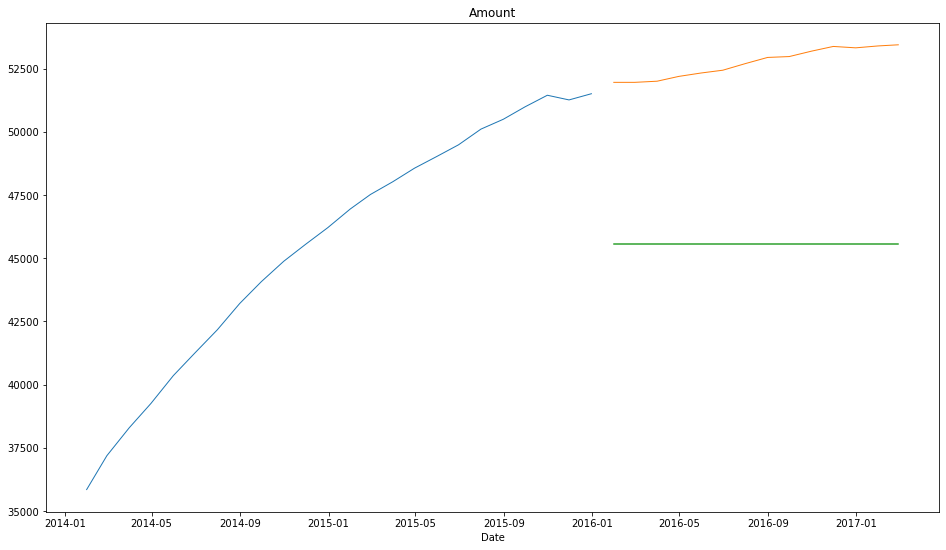

In [29]:
plt.figure(figsize = (16,9))
plt.plot(train['amount'], label='Train', linewidth=1)
plt.plot(validate['amount'], label='Validate', linewidth=1)
plt.plot(yhat_df['amount'])
plt.title('Amount')
plt.xlabel('Date')
rmse = round(sqrt(mean_squared_error(validate['amount'], yhat_df['amount'])), 0)
print('amount', 'RMSE: {:.0f}'.format(rmse))
plt.show()

In [30]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'Simple Average', 
                             target_var = col)

eval_df

,model_type,target_var,rmse
0,Last Observed,amount,1343.0
1,Simple Average,amount,7181.0


## Rolling Average:

In [31]:
amount = round(train['amount'].rolling(3).mean()[-1], 2)

In [32]:
yhat_df = make_predictions(amount)
yhat_df.head()

,amount
invoiced,
2016-01-31,51403.33
2016-02-29,51403.33
2016-03-31,51403.33
2016-04-30,51403.33
2016-05-31,51403.33


amount RMSE: 1436


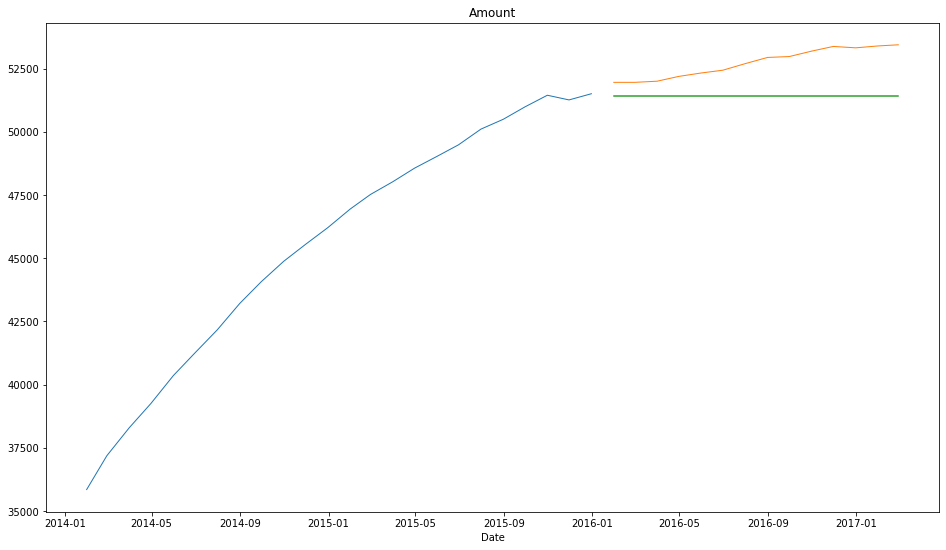

In [33]:
plt.figure(figsize = (16,9))
plt.plot(train['amount'], label='Train', linewidth=1)
plt.plot(validate['amount'], label='Validate', linewidth=1)
plt.plot(yhat_df['amount'])
plt.title('Amount')
plt.xlabel('Date')
rmse = round(sqrt(mean_squared_error(validate['amount'], yhat_df['amount'])), 0)
print('amount', 'RMSE: {:.0f}'.format(rmse))
plt.show()

In [34]:
for col in train.columns:
    eval_df = append_eval_df(model_type = '3 Month avg', 
                            target_var = col)

eval_df

,model_type,target_var,rmse
0,Last Observed,amount,1343.0
1,Simple Average,amount,7181.0
2,3 Month avg,amount,1436.0


In [35]:
periods = [1, 2, 4, 5, 10]

for p in periods: 
    amount = round(train['amount'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions(amount)
    model_type = str(p) + '_month_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)
eval_df

,model_type,target_var,rmse
0,Last Observed,amount,1343.0
1,Simple Average,amount,7181.0
2,3 Month avg,amount,1436.0
3,1_month_moving_avg,amount,1343.0
4,2_month_moving_avg,amount,1455.0
5,4_month_moving_avg,amount,1533.0
6,5_month_moving_avg,amount,1684.0
7,10_month_moving_avg,amount,2696.0


## Holts:

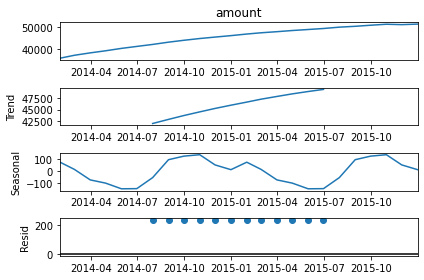

<Figure size 864x360 with 0 Axes>

In [36]:
sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()
plt.figure(figsize=(12,5))
plt.show()

In [37]:
# create our Holt's Object
model = Holt(train['amount'], exponential=True, damped=True)

# fit it
model = model.fit(optimized=True)

In [54]:
# create our Holt's Object
#model = Holt(train['amount'], exponential=False, damped=True)

# fit it
#model = model.fit(optimized=True)

In [38]:
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])
yhat_items

In [48]:
yhat_df = pd.DataFrame(index=validate.index, columns=validate.columns)

In [49]:
#yhat_df = pd.DataFrame(index=test.index, columns=test.columns)
yhat_df.amount = yhat_items
yhat_df.head()

amount RMSE: 168


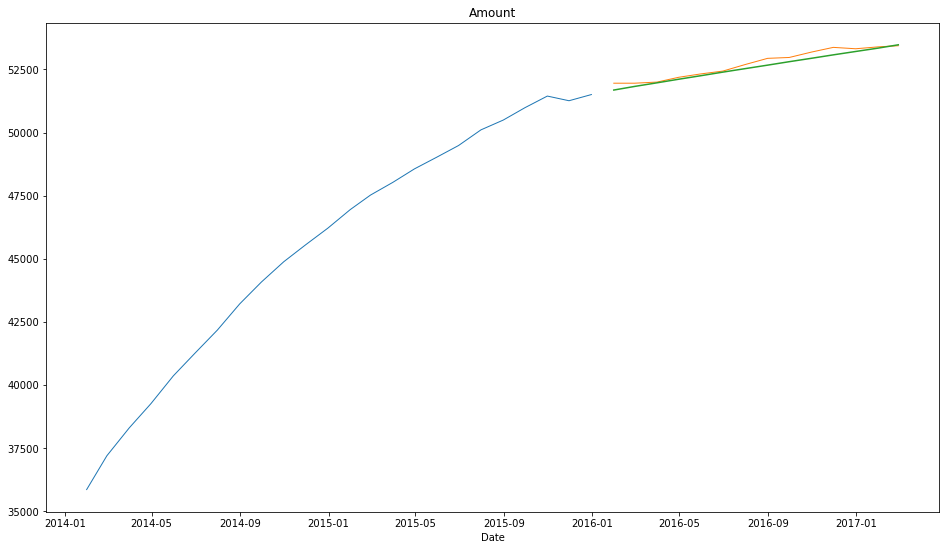

In [52]:
plt.figure(figsize = (16,9))
plt.plot(train['amount'], label='Train', linewidth=1)
plt.plot(validate['amount'], label='Validate', linewidth=1)
plt.plot(yhat_df['amount'])
plt.title('Amount')
plt.xlabel('Date')
rmse = evaluate('amount')
print('amount', 'RMSE: {:.0f}'.format(rmse))
plt.show()

In [53]:
eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col)
eval_df

,model_type,target_var,rmse
0,Last Observed,amount,1343.0
1,Simple Average,amount,7181.0
2,3 Month avg,amount,1436.0
3,1_month_moving_avg,amount,1343.0
4,2_month_moving_avg,amount,1455.0
5,4_month_moving_avg,amount,1533.0
6,5_month_moving_avg,amount,1684.0
7,10_month_moving_avg,amount,2696.0
8,holts_optimized,amount,2696.0
9,holts_optimized,amount,168.0


In [55]:
yhat = model.predict(start = test.index[0], end = test.index[-1])
yhat

2017-03-31    53607.851442
2017-04-30    53737.717437
2017-05-31    53866.594669
2017-06-30    53994.487587
2017-07-31    54121.400684
2017-08-31    54247.338495
2017-09-30    54372.305596
2017-10-31    54496.306601
2017-11-30    54619.346161
2017-12-31    54741.428964
Freq: M, dtype: float64

In [56]:
yhat_df = pd.DataFrame(index = test.index, columns = test.columns)
yhat_df.amount = yhat
yhat_df.head()

,amount
invoiced,
2017-03-31,53607.851442
2017-04-30,53737.717437
2017-05-31,53866.594669
2017-06-30,53994.487587
2017-07-31,54121.400684


amount RMSE: 569


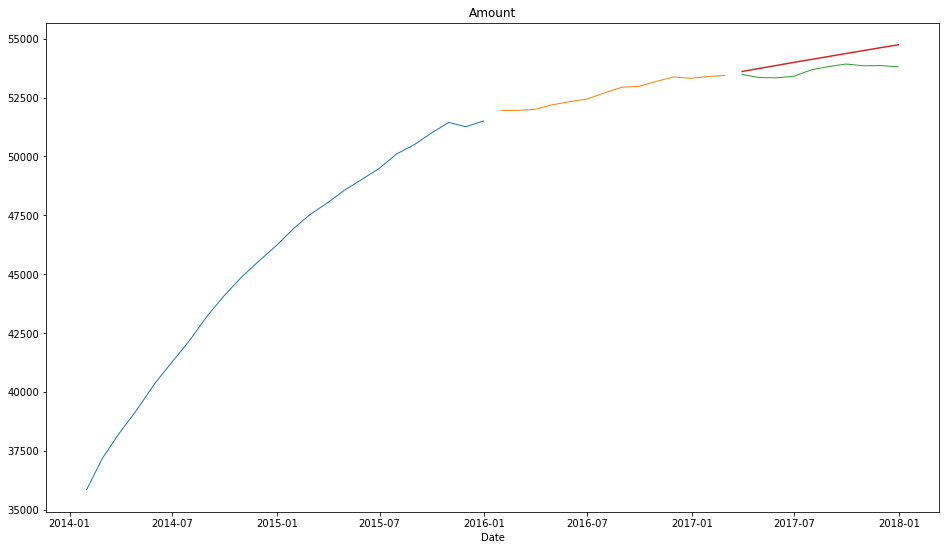

In [62]:
plt.figure(figsize = (16,9))
plt.plot(train['amount'], label='Train', linewidth=1)
plt.plot(validate['amount'], label='Validate', linewidth=1)
plt.plot(test['amount'], label='Test', linewidth=1)
plt.plot(yhat_df['amount'])
plt.title('Amount')
plt.xlabel('Date')
rmse = round(sqrt(mean_squared_error(test['amount'], yhat_df['amount'])), 0)
print('amount', 'RMSE: {:.0f}'.format(rmse))
plt.show()

---

### Bonus
Using the store data:

#### Q: Predict 2018 total monthly sales for a single store and/or item by creating a model.

#### Q: Return a dataframe with the month, store_id, y-hat, and the confidence intervals (y-hat lower, y-hat upper). The upper and lower bounds of the predictions are auto generated when using the facebook prophet model, or you could calculate your own using, for example, bollinger bands.

#### Q: Plot the 2018 monthly sales predictions.